In [38]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [39]:
with open('../track_coverage.json') as user_file:
  coverage_file = json.load(user_file)
print(coverage_file.keys())
print(len(coverage_file['crs']))
print(len(coverage_file['features']))
print(len(coverage_file['name']))
print(len(coverage_file['type']))

dict_keys(['crs', 'features', 'name', 'type'])
2
34001
11
17


In [40]:
WV_2 = []
WV_98 = []
keys_contained_WV = []
keys_not_contained_WV = []
elev = []
lat = []
lon = []
for i in range(len(coverage_file['features'])):

    if 'Retrieved WV 2' in (coverage_file['features'][i])['properties'] and 'Retrieved WV 98' in (coverage_file['features'][i])['properties']:
        WV_2.append(((coverage_file['features'][i])['properties'])['Retrieved WV 2'])
        WV_98.append(((coverage_file['features'][i])['properties'])['Retrieved WV 98'])
        elev.append(((coverage_file['features'][i])['properties'])['Retrieved Ele. Median'])
        keys_contained_WV.append(i)
        lat_average = (((coverage_file['features'])[i]['geometry']['coordinates'][0][0][0]) + \
            ((coverage_file['features'])[i]['geometry']['coordinates'][0][1][0]))/2
        lon_average = (((coverage_file['features'])[i]['geometry']['coordinates'][0][0][1]) + \
            ((coverage_file['features'])[i]['geometry']['coordinates'][0][1][1]))/2
        lat.append(lat_average)
        lon.append(lon_average)
    else:
        keys_not_contained_WV.append(i)

print(len(lat))
print(len(lon))
print(len(WV_2))
print(len(WV_98))
print(len(keys_contained_WV))
print(len(keys_not_contained_WV))
print(len(keys_contained_WV) + len(keys_not_contained_WV))
WV_range = np.array(WV_98) - np.array(WV_2)
print(type(WV_range))

33820
33820
33820
33820
33820
181
34001
<class 'numpy.ndarray'>


Text(0, 0.5, 'Frequency')

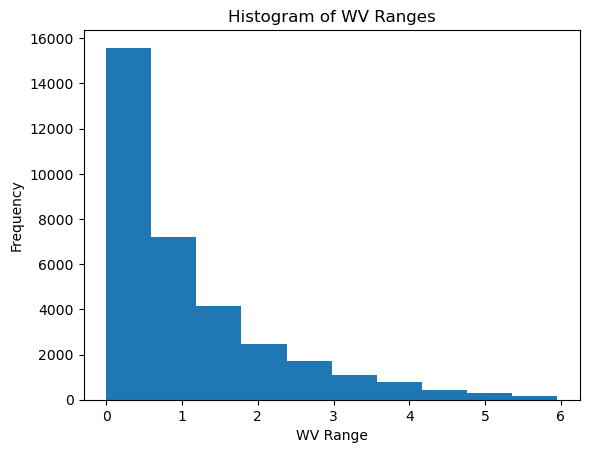

In [41]:
plt.hist(WV_range)
plt.title('Histogram of WV Ranges')
plt.xlabel('WV Range')
plt.ylabel('Frequency')

In [12]:
df = pd.DataFrame(lat, columns=['Latitude'])
df['Longitude'] = lon
df['WV range'] = WV_range
df['elev'] = elev

C:\Users\vpatro\AppData\Local\Temp\ipykernel_13848\3858444122.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


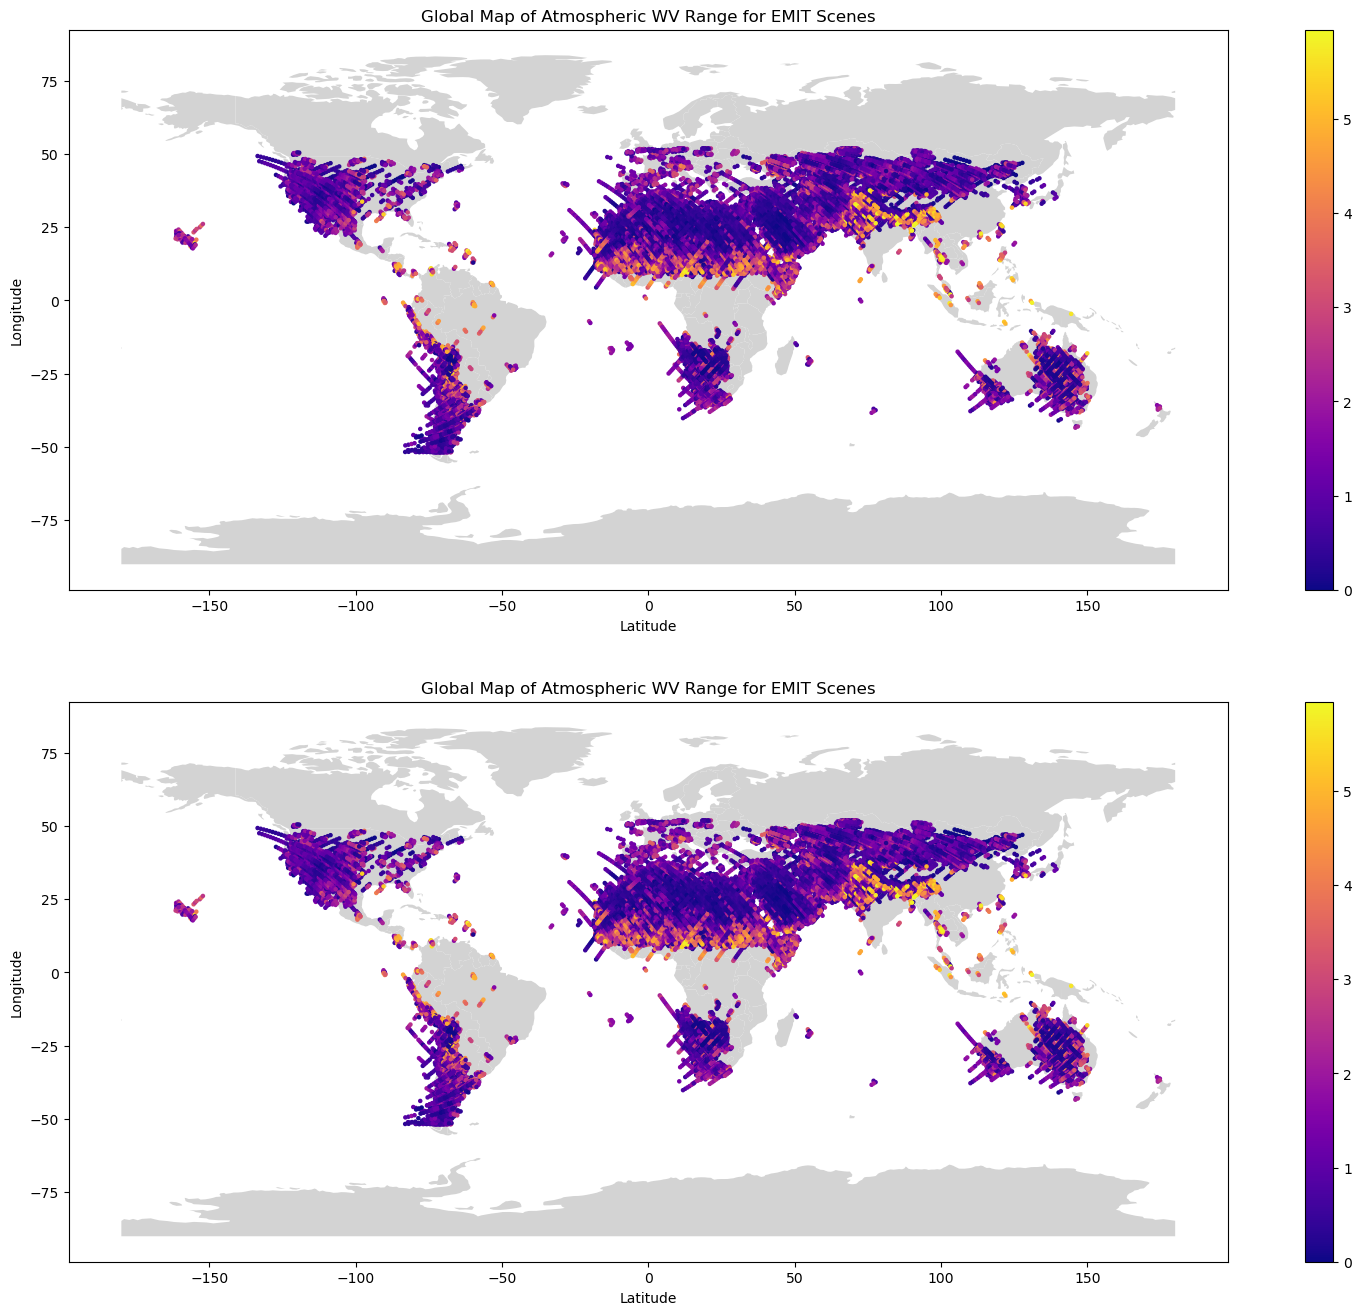

In [42]:
title = 'Global Map of Atmospheric WV Range for EMIT Scenes'
fig, ax = plt.subplots(figsize=(20,16), ncols = 1, nrows = 2, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(2):
        countries.plot(color="lightgrey", ax = ax[i])
        
# plot points

for i in range(2):
    df.plot.scatter(x="Latitude", y="Longitude", s = 5, c=df['WV range'], colormap="plasma", title= title, ax=ax[i])


In [43]:
above3_df = df[df['WV range'] > 3]
print(above3_df.shape)

(2666, 4)


C:\Users\vpatro\AppData\Local\Temp\ipykernel_13848\220372622.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


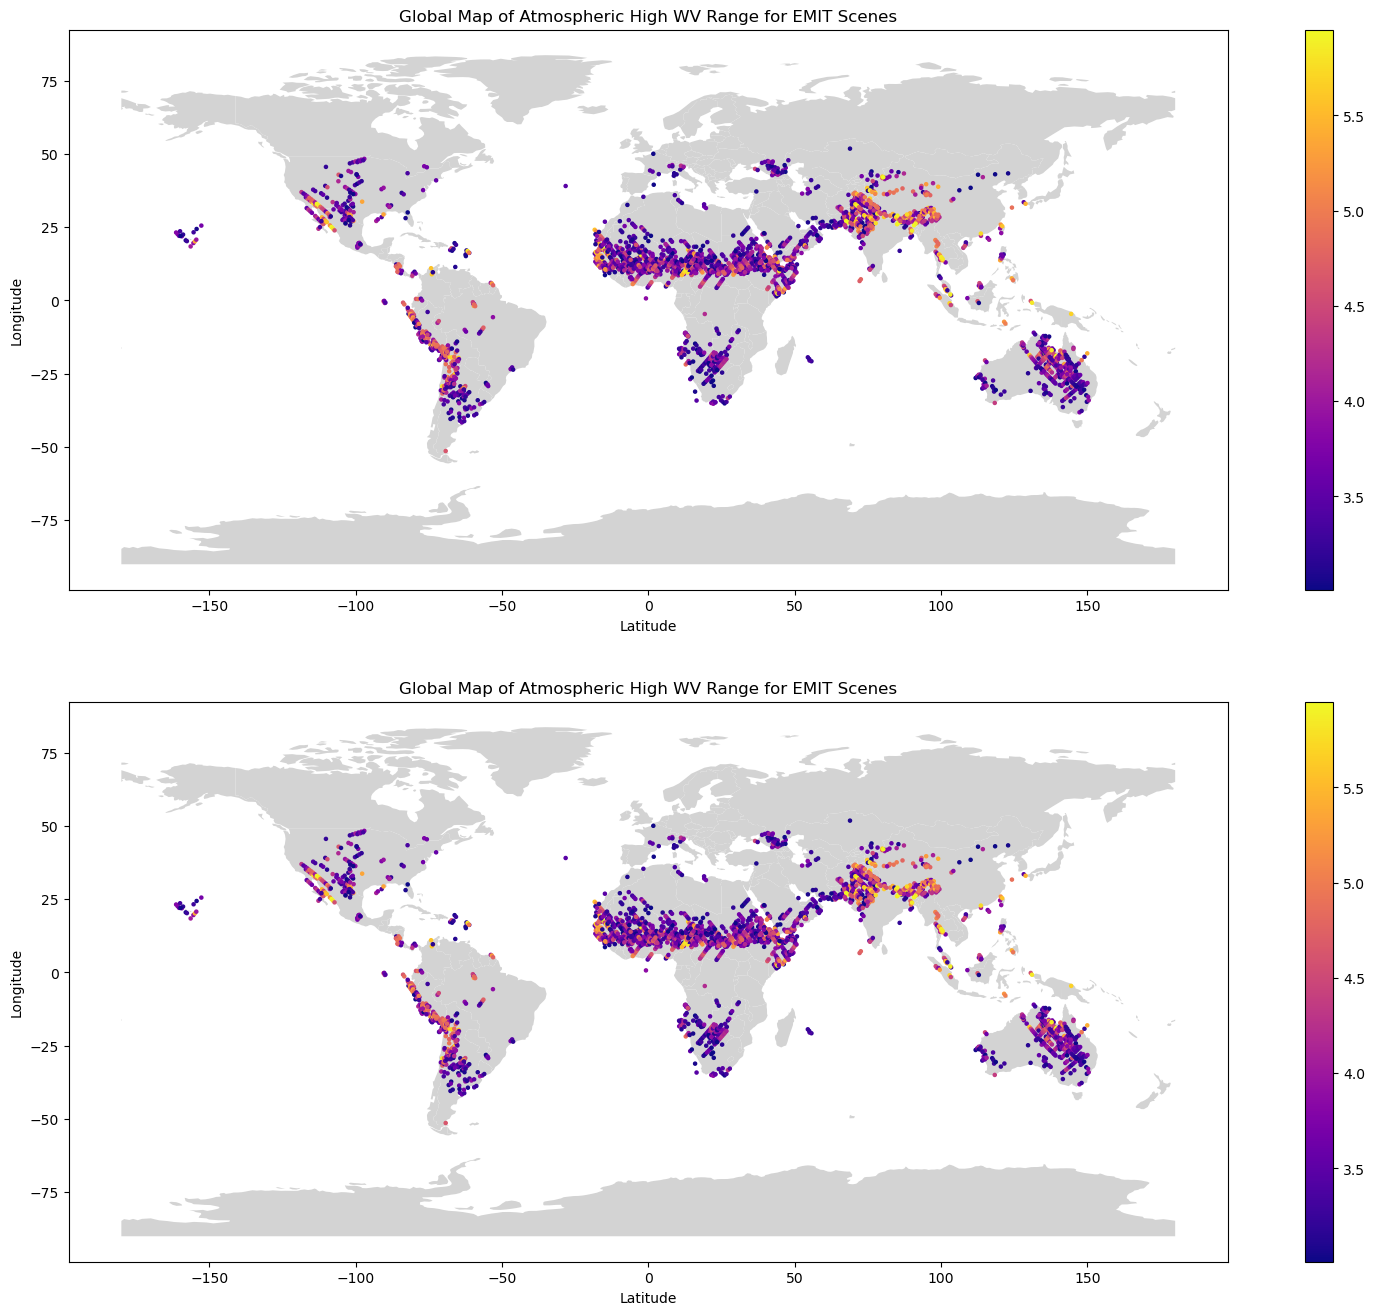

In [44]:
title = 'Global Map of Atmospheric High WV Range for EMIT Scenes'
fig, ax = plt.subplots(figsize=(20,16), ncols = 1, nrows = 2, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(2):
        countries.plot(color="lightgrey", ax = ax[i])
        
# plot points

for i in range(2):
    above3_df.plot.scatter(x="Latitude", y="Longitude", s = 5, c=above3_df['WV range'], colormap="plasma", title= title, ax=ax[i])


In [45]:
above35_df = df[df['WV range'] > 3.5]
above35_df.shape

(1746, 4)

C:\Users\vpatro\AppData\Local\Temp\ipykernel_13848\3227903592.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


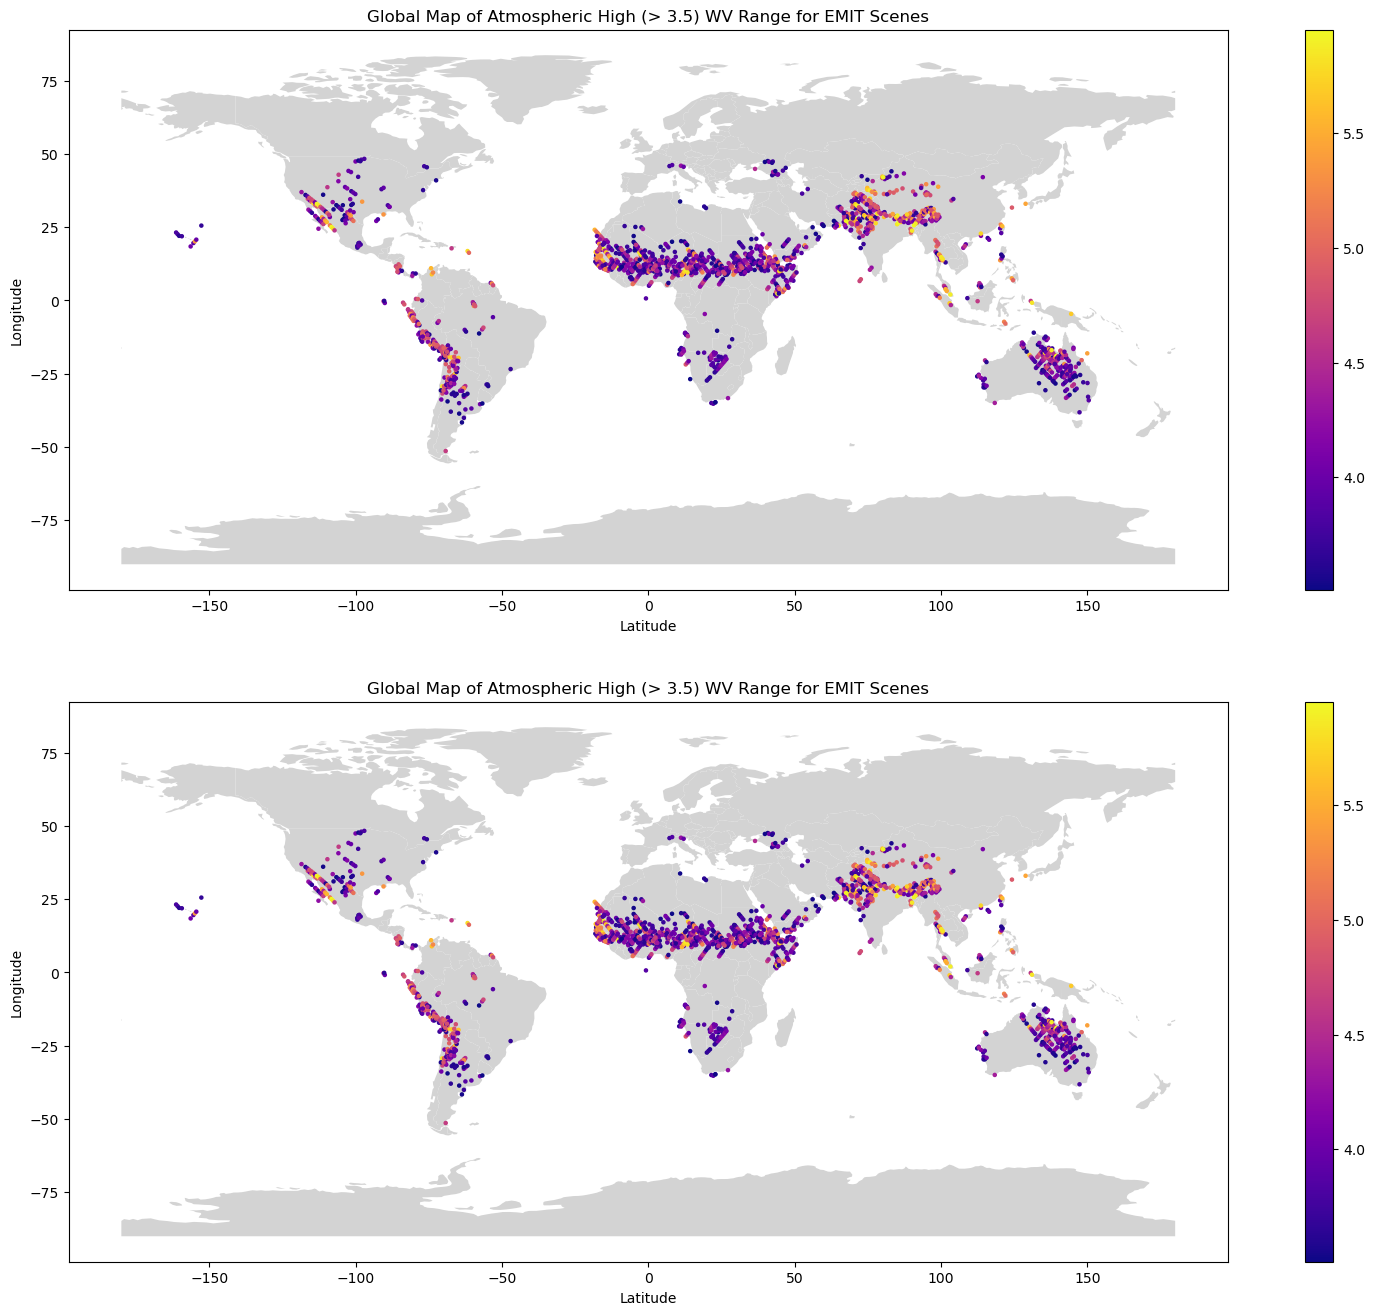

In [46]:
title = 'Global Map of Atmospheric High (> 3.5) WV Range for EMIT Scenes'
fig, ax = plt.subplots(figsize=(20,16), ncols = 1, nrows = 2, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(2):
        countries.plot(color="lightgrey", ax = ax[i])
        
# plot points

for i in range(2):
    above35_df.plot.scatter(x="Latitude", y="Longitude", s = 5, c=above35_df['WV range'], colormap="plasma", title= title, ax=ax[i])


In [47]:
high_to_low_df = df.sort_values(by=['WV range'])
high_to_low_df.shape

(33820, 4)

C:\Users\vpatro\AppData\Local\Temp\ipykernel_13848\3031528130.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


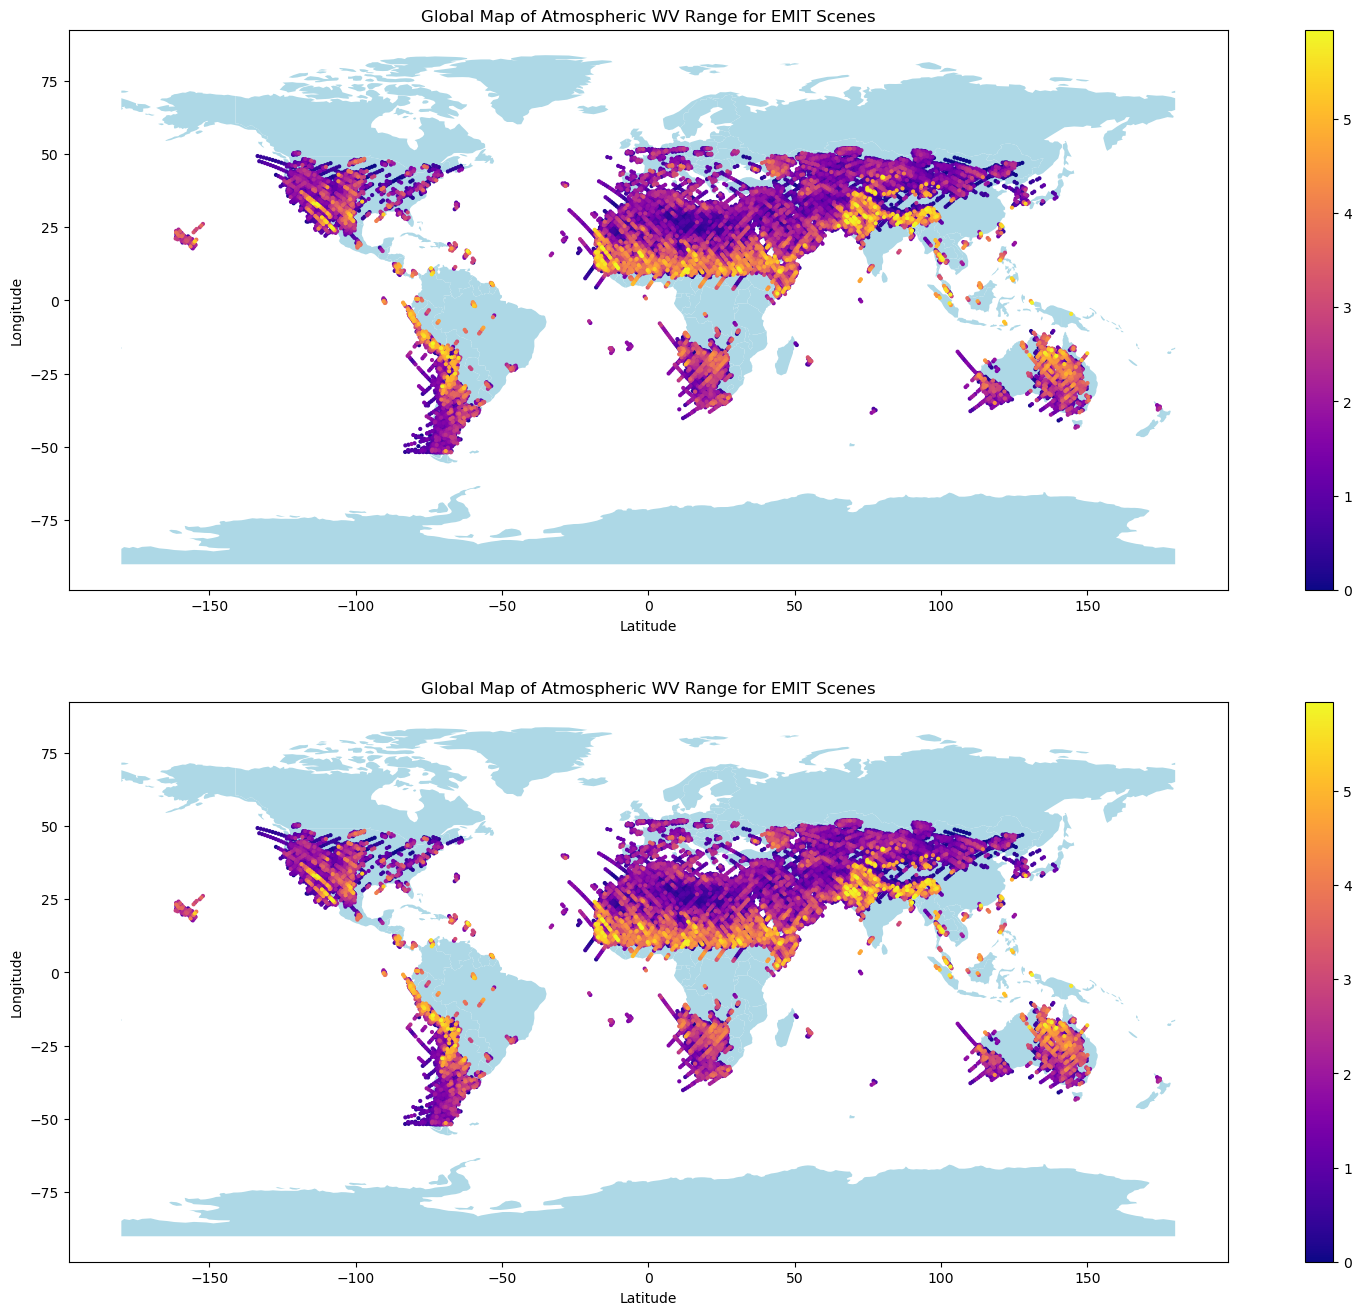

In [50]:
title = 'Global Map of Atmospheric WV Range for EMIT Scenes'
fig, ax = plt.subplots(figsize=(20,16), ncols = 1, nrows = 2, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(2):
        countries.plot(color="lightblue", ax = ax[i])
        
# plot points

for i in range(2):
    high_to_low_df.plot.scatter(x="Latitude", y="Longitude", s=4, c=high_to_low_df['WV range'], colormap="plasma", title= title, ax=ax[i])


In [51]:
low_to_high_df = df.sort_values(by=['WV range'], ascending = False)
low_to_high_df.shape

(33820, 4)

C:\Users\vpatro\AppData\Local\Temp\ipykernel_13848\3352743941.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


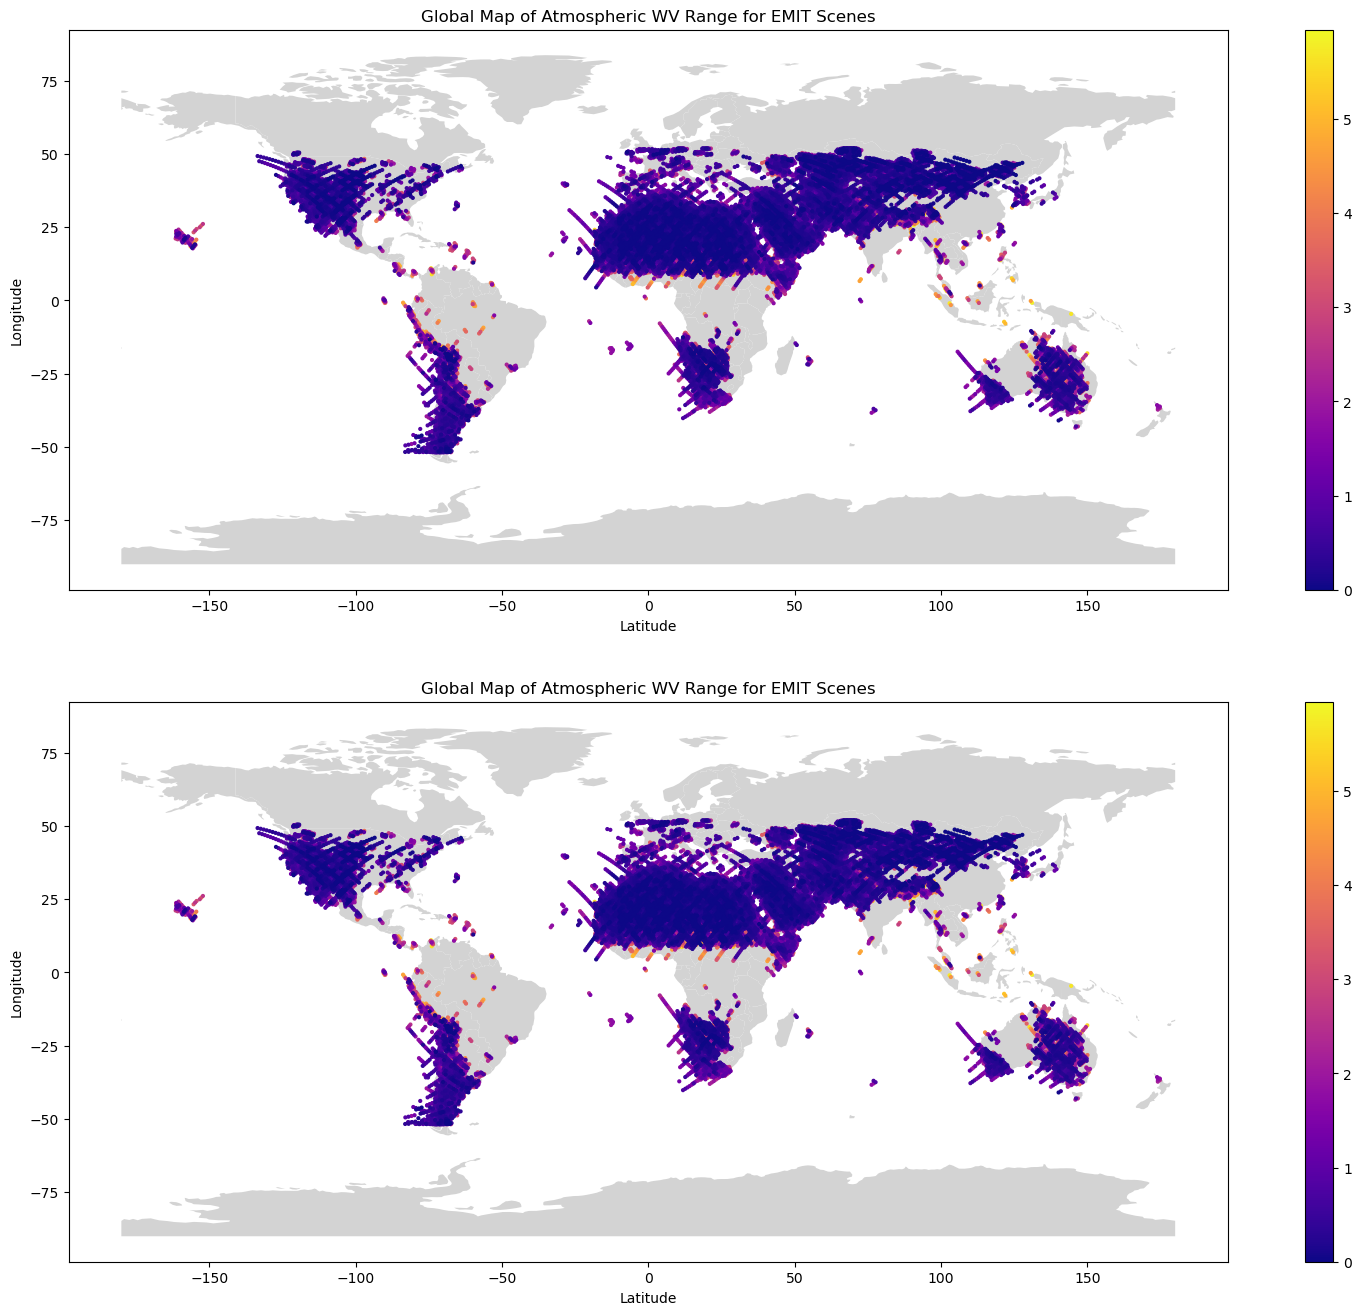

In [53]:
title = 'Global Map of Atmospheric WV Range for EMIT Scenes'
fig, ax = plt.subplots(figsize=(20,16), ncols = 1, nrows = 2, gridspec_kw = None)
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

for i in range(2):
        countries.plot(color="lightgray", ax = ax[i])
        
# plot points

for i in range(2):
    low_to_high_df.plot.scatter(x="Latitude", y="Longitude", s=4, c=low_to_high_df['WV range'], colormap="plasma", title= title, ax=ax[i])
